In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Import imblearn dependencies
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbPipeline
from collections import Counter
from numpy import where

In [6]:
cleaned_water_pump = pd.read_csv("./Data/cleaned_water_pump.csv")

In [7]:
cleaned_water_pump["region_code"]= cleaned_water_pump["region_code"].astype(str)

In [8]:
#Set X and Y 
X = cleaned_water_pump.drop("status_group", axis=1)
y = cleaned_water_pump["status_group"]

In [9]:
#Break into numeric and categorical columns 
numeric_cols = ["amount_tsh", "gps_height", 
                "age_at_inspection", "water_per_person"]
cat_cols =["basin", "region", "region_code", "lga", "public_meeting", "scheme_management", "permit",
          "extraction_type_group", "extraction_type_class", "management", "management_group", "payment", "quality_group",
          "quantity", "source", "source_class", "waterpoint_type"]
bool_cols = ["unknown_construction_yr"]

In [10]:
#Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [11]:
#Create subtypes
subpipe_num = Pipeline(steps=[("num_impute", SimpleImputer(strategy="mean")),("ss", StandardScaler())])
subpipe_cat = Pipeline(steps=[("ohe", OneHotEncoder(sparse=False, handle_unknown="ignore"))])
subpipe_ord = Pipeline(steps= [("ord_encode", OrdinalEncoder())])

In [12]:
#Column Transformers
CT = ColumnTransformer(transformers=[
                                    ("subpipe_num", subpipe_num, numeric_cols), 
                                     ("subpipe_cat", subpipe_cat, cat_cols),
                                    ("subpipe_ord", subpipe_ord, bool_cols)
                                    ], 
                       remainder="drop"
                      )

In [13]:
optimal_rfc_model_pipe = Pipeline(steps=[('ct', CT), ('rfc', RandomForestClassifier(
      criterion='gini', min_samples_leaf=5, n_estimators=100))])

optimal_rfc_model_pipe.fit(X_train, y_train)


Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('subpipe_num',
                                                  Pipeline(steps=[('num_impute',
                                                                   SimpleImputer()),
                                                                  ('ss',
                                                                   StandardScaler())]),
                                                  ['amount_tsh', 'gps_height',
                                                   'age_at_inspection',
                                                   'water_per_person']),
                                                 ('subpipe_cat',
                                                  Pipeline(steps=[('ohe',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse=False))]),
                 

In [14]:
optimal_rfc_model_pipe.score(X_train, y_train)

0.8030483288064828

In [15]:
y_preds = optimal_rfc_model_pipe.predict(X_test)

In [16]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.76      0.91      0.83      8131
           1       0.64      0.16      0.26      1046
           2       0.83      0.71      0.76      5673

    accuracy                           0.78     14850
   macro avg       0.74      0.59      0.62     14850
weighted avg       0.78      0.78      0.76     14850



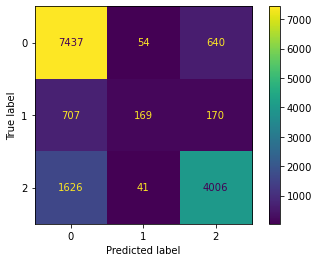

In [18]:
plot_confusion_matrix(estimator=optimal_rfc_model_pipe, X=X_test, y_true=y_test);